## Chapter 7: Linear Regression Model 

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Bài tập 1: House Pricing 

#### Read and overview

In [45]:
train = pd.read_csv('house_pricing/house_pricing/train.csv')
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [46]:
train.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [47]:
train.shape

(1460, 81)

In [48]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
X = train[['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']]
y = train['SalePrice']

#### Build model

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
print(f'The test R-square is: {model.score(X_test, y_test)}')
print(f'The train R-square is: {model.score(X_train, y_train)}')
cross_val_score(model, X, y, cv=5, scoring='r2').mean()

The test R-square is: 0.739307707297681
The train R-square is: 0.6929122152210524


0.694600034181686

#### Improved model

##### read and overview data

In [96]:
train = pd.read_csv('house_pricing/house_pricing/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [56]:
# drop ID, alley, MoSold, YrSold
# có thể kh lquan : RoofMatl, RoofStyle, Exterior1st, Exterior2nd, MasVnrType
# BsmtUnfSF, BsmtExposure

##### check dup

In [97]:
train.drop(columns=['Id', 'Alley', 'MoSold', 'YrSold', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], inplace=True, axis=1)

In [99]:
train.duplicated().any()

False

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### handle missing values and identify var

In [101]:
num_cols = train.select_dtypes('number').columns
cat_cols = train.select_dtypes('O').columns

=====
central tendency of LotFrontage: {'mean': 70.04995836802665, 'median': 69.0, 'mode': 60.0, 'min': 21.0, 'max': 313.0, 'range': 292.0}
=====
Dispersion of LotFrontage: 
 {'range': 292.0, 'q1': 59.0, 'q3': 80.0, 'iqr': 21.0, 'var': 589.7491687482653, 'skew': 2.163569142324884, 'kurtosis': 17.452867259818404}
=====


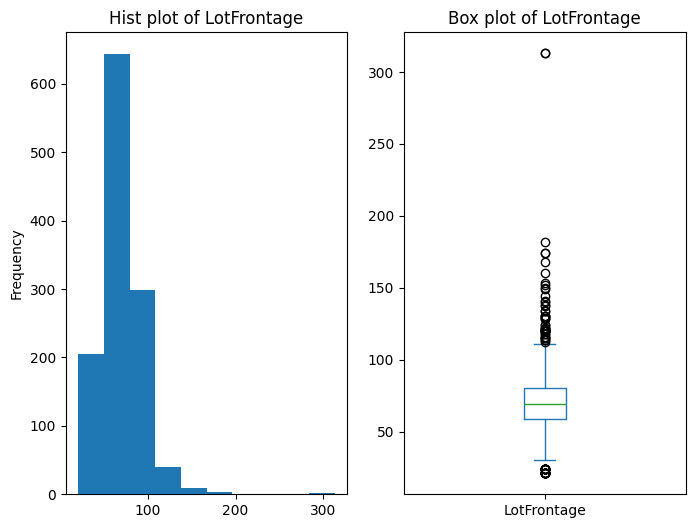

In [102]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()
_analyzer.analyze_numeric_variable('LotFrontage', train)
train.drop(columns='LotFrontage', inplace=True)

In [103]:
index_null_cat_cols = set()
for col in cat_cols:
    null_indexes = set(train[train[col].isnull()].index)
    index_null_cat_cols = index_null_cat_cols.union(null_indexes)


In [104]:
train.drop(index=index_null_cat_cols, inplace=True)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   MSZoning       1346 non-null   object 
 2   LotArea        1346 non-null   int64  
 3   Street         1346 non-null   object 
 4   LotShape       1346 non-null   object 
 5   LandContour    1346 non-null   object 
 6   Utilities      1346 non-null   object 
 7   LotConfig      1346 non-null   object 
 8   LandSlope      1346 non-null   object 
 9   Neighborhood   1346 non-null   object 
 10  Condition1     1346 non-null   object 
 11  Condition2     1346 non-null   object 
 12  BldgType       1346 non-null   object 
 13  HouseStyle     1346 non-null   object 
 14  OverallQual    1346 non-null   int64  
 15  OverallCond    1346 non-null   int64  
 16  YearBuilt      1346 non-null   int64  
 17  YearRemodAdd   1346 non-null   int64  
 18  RoofStyle    

In [106]:
df = train.isnull().any().reset_index()
df[df.iloc[:,1]]

,index,0
22,MasVnrArea,True


In [107]:
print(train.MasVnrArea.dtypes)

float64


=====
central tendency of MasVnrArea: {'mean': 110.36023916292974, 'median': 0.0, 'mode': 0.0, 'min': 0.0, 'max': 1600.0, 'range': 1600.0}
=====
Dispersion of MasVnrArea: 
 {'range': 1600.0, 'q1': 0.0, 'q3': 174.0, 'iqr': 174.0, 'var': 34449.147617594215, 'skew': 2.5826847635163266, 'kurtosis': 9.45453619362509}
=====


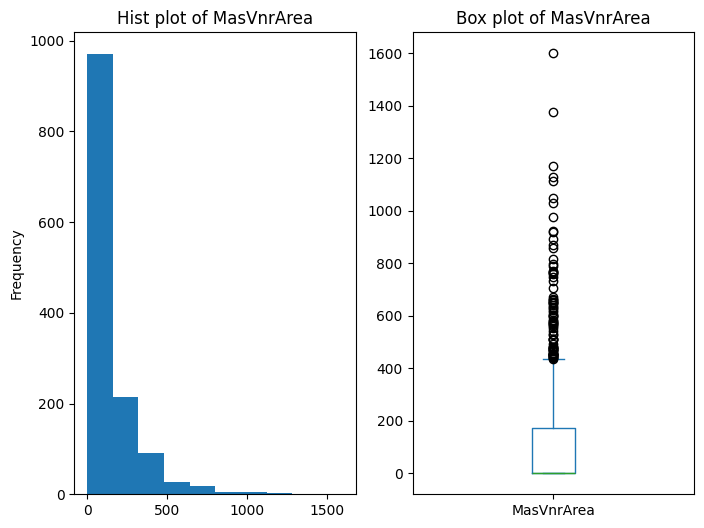

In [108]:
_analyzer.analyze_numeric_variable('MasVnrArea', train)

In [68]:
train[['MasVnrArea', 'SalePrice']].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.465811
SalePrice,0.465811,1.000000


In [109]:
train.drop(columns='MasVnrArea', axis=1, inplace=True)

In [70]:
train[['MSSubClass', 'SalePrice']].corr()

,MSSubClass,SalePrice
MSSubClass,1.00000,-0.08112
SalePrice,-0.08112,1.00000


##### EDA

In [71]:
# # có thể viết 1 hàm kiểm soát đa cộng tuyến
# df_numeric = train[num_cols]
# df_numeric.corr()

In [72]:
# df_numeric.drop(columns=['EnclosedPorch', '3SsnPorch',	'ScreenPorch',	'PoolArea',	'MiscVal'], inplace=True, axis=1)
# df_numeric.drop(columns=['GarageCars','MSSubClass', 'BsmtFinSF1',	'BsmtFinSF2', 	'BsmtUnfSF' ], inplace=True, axis=1)

In [73]:
# unique_pairs = _analyzer.create_unique_pair_variable(cat_cols)
# results = []
# for pair in unique_pairs:
#     var1, var2 = pair
#     _analyzer.analyze_category_vs_category(var1, var2, train)

In [74]:
df_categpries = train[cat_cols]

In [75]:
# train[['MSSubClass', 'YearBuilt']].corr()

In [110]:
# có cách nào khác ngoài việc dùng LLM phân biệt quá nhiều features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(drop='first')
lbe = LabelEncoder()

ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'
]


nominal_features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'GarageType', 'SaleType', 'SaleCondition'
]

for col in ordinal_features:
    train[col] = lbe.fit_transform(train[col])

train = pd.get_dummies(train, columns=nominal_features, prefix='S', dtype='int')




In [111]:
df_categpries.shape

(1346, 37)

In [112]:
len(df_categpries.select_dtypes('number').columns)

0

##### Build model

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [113]:
X = train.drop(columns='SalePrice', axis = 1)
y = train['SalePrice']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(f'The test R-square is: {model.score(X_test, y_test)}')
print(f'The train R-square is: {model.score(X_train, y_train)}')
cross_val_score(model, X, y, cv=5, scoring='r2').mean()

The test R-square is: 0.7126565557731324
The train R-square is: 0.9267945885717472


0.785400940645884

In [82]:
abse = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test,model.predict(X_test))
mape = mean_absolute_percentage_error(y_test,model.predict(X_test))
abs_err = y_test - model.predict(X_test)
print(len(abs_err[abs_err < 20000]))
print(len(abs_err))
print(abse)

229
270
20220.054941360126


In [83]:
# apply regularization
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
print(f'The test R-square is: {model.score(X_test, y_test)}')
print(f'The train R-square is: {model.score(X_train, y_train)}')
abse = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test,model.predict(X_test))
mape = mean_absolute_percentage_error(y_test,model.predict(X_test))
# cross_val_score(model, X, y, cv=200, scoring='r2').mean()

The test R-square is: 0.7734362526867785
The train R-square is: 0.9116064810859491


In [84]:
abs_err = y_test - model.predict(X_test)
print(len(abs_err[abs_err < 20000]))
print(len(abs_err))
print(abse)

228
270
19463.193919357636


In [85]:
cross_val_score(model, X, y, cv=5, scoring='r2').mean()

0.812700581087039

In [86]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=42)
cross_val_score(model, X, y, cv=cv).mean()

0.8007785594980715

In [87]:
model

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


##### Testing models effectiveness

In [88]:
# line_R_train_model1 = []
# line_R_test_model1 = []
# line_R_train_model2 = []
# line_R_test_model2 = []
# for state in range(1,201):

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

#     model_1 = LinearRegression()
#     model_1.fit(X_train, y_train)

#     model_2 = Ridge(alpha=20)
#     model_2.fit(X_train, y_train)

#     line_R_train_model1.append(model_1.score(X_train, y_train))
#     line_R_test_model1.append(model_1.score(X_test, y_test))
#     line_R_train_model2.append(model_2.score(X_train, y_train))
#     line_R_test_model2.append(model_2.score(X_test, y_test))

# plt.subplot(1,2,1)
# sns.lineplot(x=range(1,101), y=line_R_train_model1)
# sns.lineplot(x=range(1,101), y=line_R_test_model1)
# plt.subplot(1,2,2)
# sns.lineplot(x=range(1,101), y=line_R_train_model2)
# sns.lineplot(x=range(1,101), y=line_R_test_model2)
# plt.tight_layout()
# plt.show()
    

# mask = np.array(line_R_train_model1)-np.array(line_R_test_model1) <0.15
# len(mask[mask==True])/len(mask)

In [89]:
# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Ridge
# from sklearn.ensemble import RandomForestRegressor

# # 1. Load dữ liệu
# data = fetch_california_housing()
# X, y = data.data, data.target

# # 2. Chia train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # 3. Không scale
# ridge = Ridge(alpha=1).fit(X_train, y_train)
# rf    = RandomForestRegressor(random_state=0).fit(X_train, y_train)

# print("Ridge without scale:", ridge.score(X_test, y_test))
# print("RF    without scale:", rf.score(X_test, y_test))

# # 4. Có scale
# scaler = StandardScaler().fit(X_train)
# Xtr_s  = scaler.transform(X_train)
# Xte_s  = scaler.transform(X_test)

# ridge_s = Ridge(alpha=1).fit(Xtr_s, y_train)
# rf_s    = RandomForestRegressor(random_state=0).fit(Xtr_s, y_train)

# print("Ridge with scale   :", ridge_s.score(Xte_s, y_test))
# print("RF    with scale   :", rf_s.score(Xte_s, y_test))


##### Select K_best

In [114]:
from sklearn.feature_selection import f_regression, SelectKBest

In [115]:
selector = SelectKBest()
selector.fit(X,y)
df = pd.DataFrame({'scores':selector.scores_, 'features' : X.columns}).sort_values(by='scores', ascending=False)

In [116]:
df.iloc[:30]

,scores,features
111,inf,S_RRAn
199,inf,S_Oth
163,inf,S_Other
194,inf,S_Con
203,inf,S_Alloca
146,inf,S_ImStucc
184,inf,S_Mix
46,6.176979,S_C (all)
198,5.459126,S_New
2,5.221078,OverallQual


In [120]:
train[['S_RRAn']]

,S_RRAn,S_RRAn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1455,0,0
1456,0,0
1457,0,0
1458,0,0


In [122]:
train.columns.unique()

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'S_ConLw', 'S_New', 'S_Oth', 'S_WD', 'S_Abnorml', 'S_AdjLand',
       'S_Alloca', 'S_Family', 'S_Normal', 'S_Partial'],
      dtype='object', length=187)